In [102]:
import pandas as pd
import numpy as np

In [103]:
df=pd.read_csv('telecom_users.csv')
df.head()

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No


In [104]:
df.shape

(5986, 22)

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        5986 non-null   int64  
 1   customerID        5986 non-null   object 
 2   gender            5986 non-null   object 
 3   SeniorCitizen     5986 non-null   int64  
 4   Partner           5986 non-null   object 
 5   Dependents        5986 non-null   object 
 6   tenure            5986 non-null   int64  
 7   PhoneService      5986 non-null   object 
 8   MultipleLines     5986 non-null   object 
 9   InternetService   5986 non-null   object 
 10  OnlineSecurity    5986 non-null   object 
 11  OnlineBackup      5986 non-null   object 
 12  DeviceProtection  5986 non-null   object 
 13  TechSupport       5986 non-null   object 
 14  StreamingTV       5986 non-null   object 
 15  StreamingMovies   5986 non-null   object 
 16  Contract          5986 non-null   object 


In [106]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,5986.0,3533.561310,2035.705666,0.00,1777.25,3546.5,5291.75,7042.00
SeniorCitizen,5986.0,0.161377,0.367909,0.00,0.00,0.0,0.00,1.00
tenure,5986.0,32.468760,24.516391,0.00,9.00,29.0,56.00,72.00
MonthlyCharges,5986.0,64.802213,30.114702,18.25,35.65,70.4,89.90,118.75


### Data Cleaning

In [107]:
df.isna().sum()

Unnamed: 0          0
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [108]:
df["TotalCharges"]=pd.to_numeric(df["TotalCharges"],errors="coerce")

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        5986 non-null   int64  
 1   customerID        5986 non-null   object 
 2   gender            5986 non-null   object 
 3   SeniorCitizen     5986 non-null   int64  
 4   Partner           5986 non-null   object 
 5   Dependents        5986 non-null   object 
 6   tenure            5986 non-null   int64  
 7   PhoneService      5986 non-null   object 
 8   MultipleLines     5986 non-null   object 
 9   InternetService   5986 non-null   object 
 10  OnlineSecurity    5986 non-null   object 
 11  OnlineBackup      5986 non-null   object 
 12  DeviceProtection  5986 non-null   object 
 13  TechSupport       5986 non-null   object 
 14  StreamingTV       5986 non-null   object 
 15  StreamingMovies   5986 non-null   object 
 16  Contract          5986 non-null   object 


In [110]:
df.isna().sum()

Unnamed: 0           0
customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        10
Churn                0
dtype: int64

In [111]:
# dropped missing values rows
df.dropna(axis=0,inplace=True)
df.shape

(5976, 22)

In [112]:
# dropped useless features
df.drop(['customerID','Unnamed: 0'], axis=1, inplace=True)

In [113]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,Female,0,No,No,44,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.20,No
2,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,Male,0,No,No,4,Yes,No,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.50,No
4,Male,0,No,No,2,Yes,No,DSL,Yes,No,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.50,No


### Data analysis & visualisation

In [114]:
import matplotlib.pyplot as plt
import seaborn as sns

In [115]:
df['SeniorCitizen']=df['SeniorCitizen'].astype('category')
int_feat = df.select_dtypes(exclude=['object','category']).columns
int_feat

Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

In [116]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
tenure,5976.0,32.523092,24.500858,1.00,9.0000,29.000,56.0000,72.00
MonthlyCharges,5976.0,64.846687,30.107576,18.25,35.7500,70.425,89.9000,118.75
TotalCharges,5976.0,2298.060617,2274.127165,18.80,404.3125,1412.150,3846.9625,8684.80


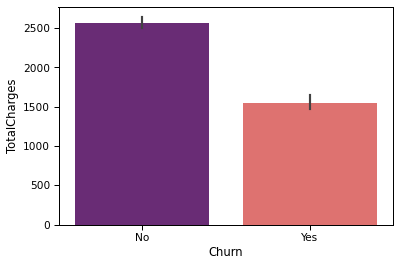

In [117]:
sns.barplot(x='Churn',y='TotalCharges',data=df,palette='magma');

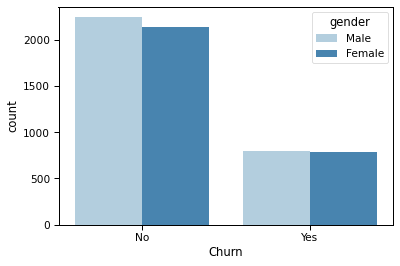

In [118]:
sns.countplot(x='Churn',hue='gender',data=df,palette='Blues');

<AxesSubplot:xlabel='gender', ylabel='TotalCharges'>

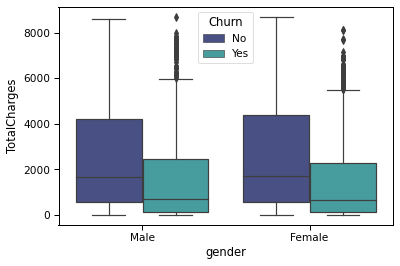

In [119]:
sns.boxplot(x='gender',y='TotalCharges',data=df,hue='Churn',palette='mako')

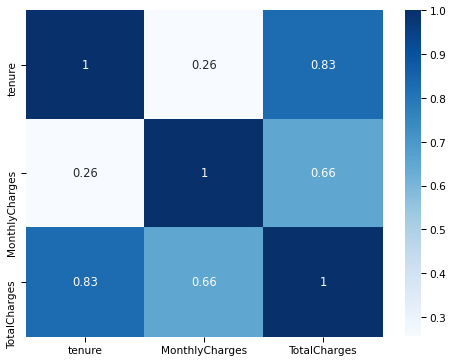

In [120]:
plt.figure(figsize=(8,6))
sns.set_context('paper',font_scale=1.2)
crash_mx=df.corr() 
sns.heatmap(crash_mx,annot=True,cmap='Blues');

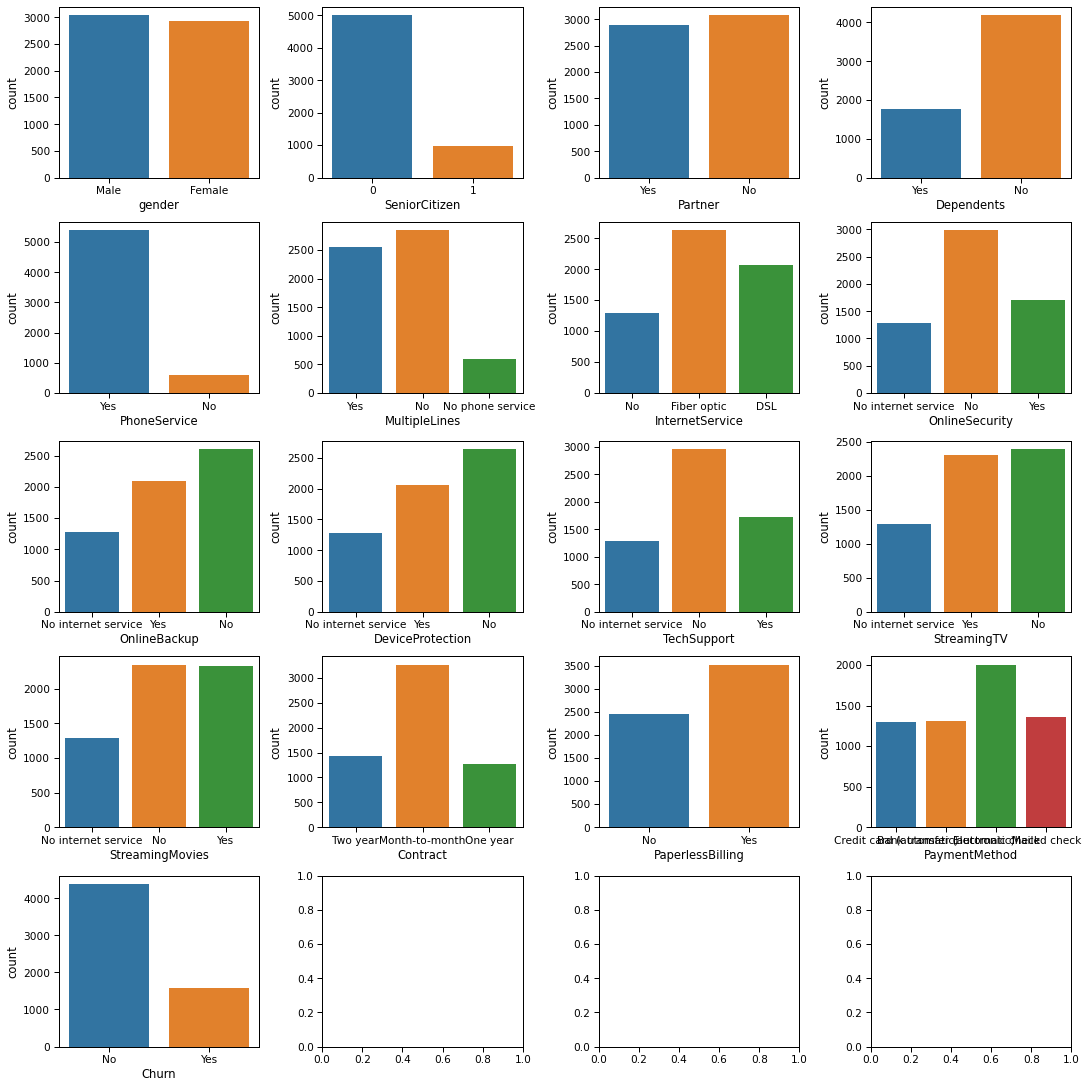

In [121]:
cat_cols = df.select_dtypes(include=['object','category']).columns
fig, ax = plt.subplots(nrows=5, ncols=4, figsize=(15,15), constrained_layout=True)
ax=ax.flatten()
for x,i in enumerate(cat_cols):
    sns.countplot(x=df[i], ax=ax[x])

### Data Preprocessing

In [122]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,Female,0,No,No,44,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.20,No
2,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,Male,0,No,No,4,Yes,No,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.50,No
4,Male,0,No,No,2,Yes,No,DSL,Yes,No,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.50,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5981,Male,0,Yes,No,1,Yes,No,Fiber optic,Yes,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.00,95.00,Yes
5982,Female,0,Yes,Yes,23,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),91.10,2198.30,No
5983,Male,0,Yes,Yes,12,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,21.15,306.05,No
5984,Male,1,No,No,12,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.45,1200.15,Yes


In [123]:
df=df.replace('Yes',1)
df=df.replace('No',0)
df=df.replace('Male',1)
df=df.replace('Female',0)
df=pd.get_dummies(data=df, columns=['Contract','PaymentMethod','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','MultipleLines'],drop_first=True )

In [124]:
X=df.drop(['Churn'], axis=1)
y=df['Churn']
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Contract_One year,...,DeviceProtection_1,DeviceProtection_No internet service,TechSupport_1,TechSupport_No internet service,StreamingTV_1,StreamingTV_No internet service,StreamingMovies_1,StreamingMovies_No internet service,MultipleLines_1,MultipleLines_No phone service
0,1,0,1,1,72,1,0,24.10,1734.65,0,...,0,1,0,1,0,1,0,1,1,0
1,0,0,0,0,44,1,1,88.15,3973.20,0,...,1,0,0,0,1,0,0,0,0,0
2,0,1,1,0,38,1,1,74.95,2869.85,0,...,0,0,0,0,0,0,0,0,1,0
3,1,0,0,0,4,1,1,55.90,238.50,0,...,0,0,0,0,0,0,1,0,0,0
4,1,0,0,0,2,1,0,53.45,119.50,0,...,1,0,0,0,0,0,0,0,0,0


In [125]:
y.value_counts()

0    4389
1    1587
Name: Churn, dtype: int64

In [126]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=42)

In [128]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

### Model training, testing and tuning

In [168]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from numpy import mean
from sklearn.metrics import mean_squared_error
from math import sqrt
err={}
acc=[]

In [169]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
model_lr=lr.fit(X_train,y_train)
prediction_lr=model_lr.predict(X_test)
print("Accuracy Score on traning data",lr.score(X_train,y_train))
print("Accuracy Score on test data",lr.score(X_test,y_test))

Accuracy Score on traning data 0.800649512865351
Accuracy Score on test data 0.8018246325392803


In [170]:
acc.append(cross_val_score(lr, X, y, cv=10, scoring='accuracy').mean())
print('Logistic Regression: {} \n'.format(cross_val_score(lr, X, y, cv=5, scoring='accuracy').mean()));
print(confusion_matrix(y_test, prediction_lr))
print(classification_report(y_test, prediction_lr))
### error measures
train_preds = lr.predict(X_train)
mse = mean_squared_error(y_train, train_preds)
rmse = sqrt(mse)
print("MSE {} \nRMSE {}".format(mse, rmse))
err['Logistic Regression']=[mse,rmse]

C:\Users\m\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\m\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

Logistic Regression: 0.8030445977526203 

[[1293  158]
 [ 233  289]]
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1451
           1       0.65      0.55      0.60       522

    accuracy                           0.80      1973
   macro avg       0.75      0.72      0.73      1973
weighted avg       0.79      0.80      0.80      1973

MSE 0.199350487134649 
RMSE 0.4464868275040698


C:\Users\m\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [171]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
model_dt=dt.fit(X_train,y_train)
prediction_dt=model_dt.predict(X_test)
print("Accuracy Score on traning data",dt.score(X_train,y_train))
print("Accuracy Score on test data",dt.score(X_test,y_test))

Accuracy Score on traning data 0.9982513115163627
Accuracy Score on test data 0.7131272174353775


In [172]:
acc.append(cross_val_score(dt, X, y, cv=10, scoring='accuracy').mean())
print('Decision Tree: {} \n'.format(cross_val_score(dt, X, y, cv=5, scoring='accuracy').mean()));
print(confusion_matrix(y_test, prediction_dt))
print(classification_report(y_test, prediction_dt))
### error measures
train_preds = dt.predict(X_train)
mse = mean_squared_error(y_train, train_preds)
rmse = sqrt(mse)
print("MSE {} \nRMSE {}".format(mse, rmse))
err['Decision Tree']=[mse,rmse]

Decision Tree: 0.7295849484334113 

[[1158  293]
 [ 273  249]]
              precision    recall  f1-score   support

           0       0.81      0.80      0.80      1451
           1       0.46      0.48      0.47       522

    accuracy                           0.71      1973
   macro avg       0.63      0.64      0.64      1973
weighted avg       0.72      0.71      0.71      1973

MSE 0.0017486884836372721 
RMSE 0.041817322769843505


In [173]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
model_rf=rf.fit(X_train,y_train)
prediction_rf=model_rf.predict(X_test)
print("Accuracy Score on traning data",rf.score(X_train,y_train))
print("Accuracy Score on test data",rf.score(X_test,y_test))

Accuracy Score on traning data 0.9982513115163627
Accuracy Score on test data 0.7886467308667005


In [174]:
acc.append(cross_val_score(rf, X, y, cv=10, scoring='accuracy').mean())
print('Random Forest: {} \n'.format(cross_val_score(rf, X, y, cv=5, scoring='accuracy').mean()));
print(confusion_matrix(y_test, prediction_rf))
print(classification_report(y_test, prediction_rf))
### error measures
train_preds = rf.predict(X_train)
mse = mean_squared_error(y_train, train_preds)
rmse = sqrt(mse)
print("MSE {} \nRMSE {}".format(mse, rmse))
err['Random Forest']=[mse,rmse]

Random Forest: 0.7930049957319377 

[[1306  145]
 [ 272  250]]
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1451
           1       0.63      0.48      0.55       522

    accuracy                           0.79      1973
   macro avg       0.73      0.69      0.70      1973
weighted avg       0.78      0.79      0.78      1973

MSE 0.0017486884836372721 
RMSE 0.041817322769843505


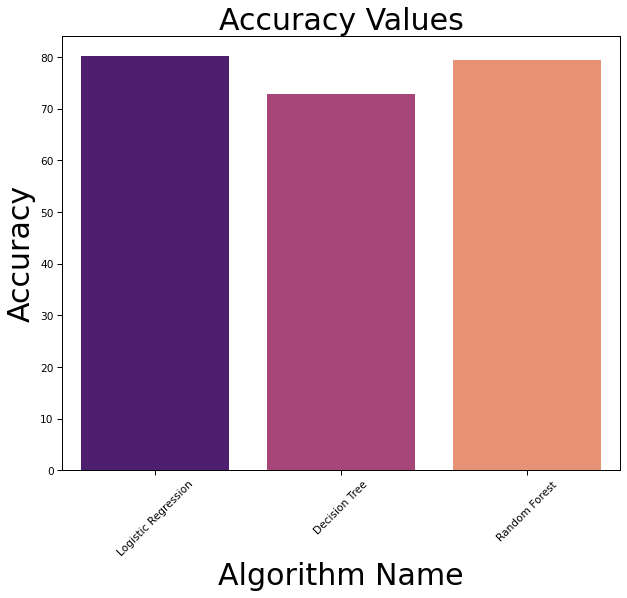

In [175]:
algo_name=['Logistic Regression','Decision Tree','Random Forest']
acc=np.array(acc)
from numpy import median
plt.figure(figsize=(10,8))
sns.barplot(y=acc*100,x=algo_name,estimator=median,palette="magma")
plt.title("Accuracy Values",size=30)
plt.xlabel('Algorithm Name',size=30)
plt.xticks(rotation=45)
plt.ylabel('Accuracy',size=30);